In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline


## vanishing/exploding gradients problem


In [ ]:
def logit(z):
    return 1/(1+np.exp(-z))

In [ ]:
z = np.linspace(-5,5,200)

In [ ]:
plt.plot([-5,5],[0,0],"b-")
plt.plot([0,0],[-0.2,1.3],"b-")
plt.plot([-5,5],[1,1],"b--")
plt.plot(z,logit(z),linewidth = 5)
plt.plot([-5,5],[-0.72,1.75])
plt.axis([-5, 5, -0.2, 1.2])
props = {"Facecolor": "black", "shrink":0.1}
plt.annotate("Saturating",xytext = (3.5,0.7) , xy = (5,1), arrowprops = props,fontsize = 14, ha = "center")
plt.annotate("Saturating",xytext = (-3,0.3) , xy = (-5,0), arrowprops = props,fontsize = 14, ha = "center")
plt.annotate("linear",xytext = (1,0.4) , xy = (1,0.8), arrowprops = props,fontsize = 14, ha = "center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize = 14)
plt.show()

In [ ]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

In [ ]:
keras.layers.Dense(10,activation = "relu",kernel_initializer = "he_normal")

In [ ]:
init = keras.initializers.VarianceScaling(scale = 2,mode = "fan_avg",distribution = "uniform")
keras.layers.Dense(10,activation = "relu",kernel_initializer = init)

## non saturating activation functions

In [ ]:
#leaky ReLU

In [ ]:
def leaky_relu(z,alpha = 0.01):
    return np.maximum(z,alpha*z)

In [ ]:
plt.plot(z,leaky_relu(z,0.05),"b-",linewidth =2)
plt.plot([-5,5],[0,0],"k--")
plt.plot([0,0],[0,5],"k--")
plt.grid(True)
plt.axis([-5,5,-1,4.2])
props = {"Facecolor": "black", "shrink":0.1}
plt.annotate("Leak",xytext = (-2,0.2) , xy = (-4,-0.2), arrowprops = props,fontsize = 14, ha = "center")


In [ ]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [ ]:
[m for m in dir(keras.activations) if not m.startswith("_")]

In [ ]:

[m for m in dir(keras.layers) if "relu" in m.lower()]

In [2]:
(x_train_full,y_train_full),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full  = x_train_full/255.0
x_test = x_test/255.0
x_train,x_val = x_train_full[:50000],x_train_full[50000:]
y_train,y_val = y_train_full[:50000],y_train_full[50000:]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
                                keras.layers.Flatten(input_shape = [28,28]),
                                keras.layers.Dense(400,kernel_initializer = "he_normal"),
                                keras.layers.LeakyReLU(),
                                keras.layers.Dense(100,kernel_initializer = "he_normal"),
                                keras.layers.LeakyReLU(),
                                keras.layers.Dense(10,activation = "softmax")
])

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"],optimizer = keras.optimizers.SGD(lr = 1e-3))

In [ ]:
history = model.fit(x_train,y_train,epochs = 10,validation_data = (x_val,y_val))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
                                keras.layers.Flatten(input_shape = [28,28]),
                                keras.layers.Dense(400,kernel_initializer = "he_normal"),
                                keras.layers.PReLU(),
                                keras.layers.Dense(100,kernel_initializer = "he_normal"),
                                keras.layers.PReLU(),
                                keras.layers.Dense(10,activation = "softmax")
])

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"],optimizer = keras.optimizers.SGD(lr = 1e-3))

In [ ]:
history = model.fit(x_train,y_train,epochs = 10,validation_data = (x_val,y_val))

In [ ]:
#elu
def elu(z, alpha = 1):
    return np.where(z<0,alpha*(np.exp(z)-1),z)

In [ ]:
plt.plot(z,elu(z),"b-",linewidth = 2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [ ]:
keras.layers.Dense(10, activation = elu)

In [ ]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [ ]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

In [ ]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [ ]:
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

In [ ]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28])),
model.add(keras.layers.Dense(300,activation = "selu", kernel_initializer = "lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100,activation = "selu", kernel_initializer = "lecun_normal"))
model.add(keras.layers.Dense(10, activation = "softmax"))
    

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = keras.optimizers.SGD(lr = 1e-3),
            metrics = ["accuracy"])

In [3]:
pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)
x_train_scaled = (x_train - pixel_means) / pixel_stds
x_val_scaled = (x_val- pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=5,
                    validation_data=(x_val_scaled, y_val))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))



In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(x_train_scaled, y_train, epochs=5,
                    validation_data=(x_val_scaled, y_val))

In [ ]:
#batch normalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation = "elu",kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation = "elu",kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation = "softmax")
])



In [ ]:
model.summary()

In [ ]:
model.layers

In [ ]:
bn1 = model.layers[1]
[(var.name,var.trainable) for var in bn1.variables]

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", metrics =["accuracy"],optimizer = keras.optimizers.SGD(lr = 1e-3))

In [ ]:
history = model.fit(x_train,y_train,epochs = 10 ,validation_data = (x_val,y_val))

In [ ]:
#when using bn we dont need bias term because anywy it is going to be subtracted during batch normalizatio0n
#sometimes using bn before activation function works better
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100,use_bias= False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10,activation = "softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val))

## gradient clipping

In [ ]:
#all keras optimizers accept clipnorm or clipvalue
optimizer = keras.optimizers.SGD(clipvalue = 1.0)


In [ ]:
optimizer = keras.optimizers.SGD(clipnorm = 1.0)

## reusing pretrained model

In [ ]:
def split_dataset(x,y):
    y_5_or_6= (y==5)|(y==6) #sandals or shirts
    y_a = y[~y_5_or_6]
    y_a[y_a>6] -=2 #indices 789 should be moved to 567
    y_b = (y[y_5_or_6] == 6).astype(np.float32)#binary classification
    return (x[~y_5_or_6],y_a),(x[y_5_or_6],y_b)
(x_train_a, y_train_a), (x_train_b, y_train_b) = split_dataset(x_train, y_train)
(x_val_a, y_val_a), (x_val_b, y_val_b) = split_dataset(x_val, y_val)
(x_test_a, y_test_a), (x_test_b, y_test_b) = split_dataset(x_test, y_test)
x_train_b = x_train_b[:200]
y_train_b = y_train_b[:200]

In [ ]:
x_train_a.shape


In [ ]:
x_train_b.shape

In [ ]:
y_train_a[:30]

In [ ]:
y_train_b[:30]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model_a =  keras.models.Sequential()
model_a.add(keras.layers.Flatten(input_shape = [28,28]))
for n_hidden in (30,100,50,50):
    model_a.add(keras.layers.Dense(n_hidden,activation = "selu"))
model_a.add(keras.layers.Dense(8,activation = "softmax"))

In [ ]:
model_a.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])
history = model_a.fit(x_train_a, y_train_a, epochs=20,
                    validation_data=(x_val_a, y_val_a))

In [ ]:
model_a.save("my_model_A.h5")

In [ ]:
model_b = keras.models.Sequential()
model_b.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_b.add(keras.layers.Dense(n_hidden, activation="selu"))
model_b.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_b.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])
history = model_b.fit(x_train_b, y_train_b, epochs=20,
                      validation_data=(x_val_b, y_val_b))

In [ ]:
model_b.summary()

In [ ]:
model_a = keras.models.load_model("my_model_A.h5")
model_b_on_a = keras.models.Sequential(model_a.layers[:-1])
model_b_on_a.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_a_clone = keras.models.clone_model(model_a)
model_a_clone.set_weights(model_a.get_weights())

In [ ]:
for layer in model_b_on_a.layers[:-1]:
    layer.trainable = False

model_b_on_a.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [ ]:
history = model_b_on_a.fit(x_train_b, y_train_b, epochs=4,
                           validation_data=(x_val_b, y_val_b))

for layer in model_b_on_a.layers[:-1]:
    layer.trainable = True

model_b_on_a.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_b_on_a.fit(x_train_b, y_train_b, epochs=16,
                           validation_data=(x_val_b, y_val_b))

In [ ]:
model_b.evaluate(x_test_b, y_test_b)

In [ ]:
model_b_on_a.evaluate(x_test_b, y_test_b)

In [ ]:
(100 - 96.89) / (100 - 98.94)

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [ ]:
#Nesterov Accelerated Gradient
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [ ]:
#AdaGrad
optimizer = keras.optimizers.Adagrad(lr=0.001)

In [ ]:
#RMSProp
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [ ]:
#Adam Optimization
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)


In [ ]:
#Adamax Optimization
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
#Nadam Optimization
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs = 25
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_val_scaled, y_val))

In [ ]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(x_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Exponential Scheduling

In [ ]:

def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_val_scaled, y_val),
                    callbacks=[lr_scheduler])

In [ ]:

plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()


In [ ]:

def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [ ]:
#If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

In [ ]:
k = keras.backend
class ExponentialDecay(keras.callbacks.Callback):
     def __init__(self, s=40000):
        super().__init__()
        self.s = s
     def on_batch_begin(self,batch,logs = None):
        # Note: the `batch` argument is reset at each epoch
        lr = k.get_value(self.model.optimizer.lr)
        k.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))
     def on_epoch_end(self,batch,logs=None):
        logs = logs or {}
        logs["lr"] = k.get_value(self.model.optimizer.lr)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(x_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_val_scaled, y_val),
                    callbacks=[exp_decay])

In [ ]:
n_steps = n_epochs * len(x_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

In [ ]:

plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

## piecewise constant scheduling

In [ ]:
def piecewise_constant_fn(epoch):
    if epoch<5:
        return 0.01
    elif epoch<15:
        return 0.005
    else:
        return 0.001
    

In [ ]:

def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])


In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_val_scaled, y_val),
                    callbacks=[lr_scheduler])

In [ ]:

plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [5]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_val_scaled, y_val),
                    callbacks=[lr_scheduler])

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7455 - accuracy: 0.7684 - val_loss: 0.5169 - val_accuracy: 0.8392
Epoch 2/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5082 - accuracy: 0.8351 - val_loss: 0.5365 - val_accuracy: 0.8411
Epoch 3/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4627 - accuracy: 0.8524 - val_loss: 0.6066 - val_accuracy: 0.8276
Epoch 4/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4834 - accuracy: 0.8507 - val_loss: 0.6790 - val_accuracy: 0.7941
Epoch 5/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5158 - accuracy: 0.8469 - val_loss: 0.5117 - val_accuracy: 0.8509
Epoch 6/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4906 - accuracy: 0.8563 - val_loss: 0.8909 - val_accuracy: 0.8049
Epoch 7/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5374 - accuracy: 0.8526 - val_loss: 0.5881 - val_accuracy:

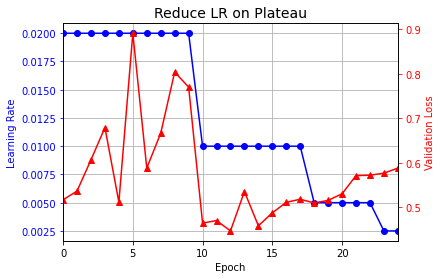

In [6]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [23]:
history.history

{'loss': [0.6006370782852173,
  0.5083778500556946,
  0.4859870672225952,
  0.5086763501167297,
  0.5048837065696716,
  0.4946487247943878,
  0.5260151028633118,
  0.5097629427909851,
  0.5347229838371277,
  0.5175421833992004,
  0.2917076051235199,
  0.23738326132297516,
  0.21766537427902222,
  0.2027854174375534,
  0.18995487689971924,
  0.18108037114143372,
  0.17110192775726318,
  0.15860991179943085,
  0.10742174834012985,
  0.09315134584903717,
  0.08611530065536499,
  0.08046223968267441,
  0.07512518763542175,
  0.058208975940942764,
  0.05255109444260597],
 'accuracy': [0.803820013999939,
  0.8366000056266785,
  0.8466600179672241,
  0.8464800119400024,
  0.851859986782074,
  0.8545799851417542,
  0.8540599942207336,
  0.8580399751663208,
  0.8574000000953674,
  0.8608599901199341,
  0.9002199769020081,
  0.9127799868583679,
  0.9197800159454346,
  0.9257000088691711,
  0.9301599860191345,
  0.9325199723243713,
  0.9356799721717834,
  0.9409199953079224,
  0.9571800231933594,

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

## avoiding overfitting through regularization


In [ ]:
#l1 and l2 regularization

In [ ]:
layer = keras.layers.Dense(100,activation = "elu",kernel_initializer = "he_normal",kernel_regularizer=
                           keras.regularizers.l2(0.01))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_val_scaled, y_val))

In [ ]:
from functools import partial
regularizeddense = partial(keras.layers.Dense,activation = "elu",kernel_initializer= "he_normal"
                           ,kernel_regularizer = keras.regularizers.l2(0.01))
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    regularizeddense(300),
    regularizeddense(100),
    regularizeddense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_val_scaled, y_val))


## dropout

In [ ]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_val_scaled, y_val))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_val_scaled, y_val))

In [ ]:
model.evaluate(x_test_scaled, y_test)

In [ ]:
model.evaluate(x_train_scaled, y_train)

In [ ]:

history = model.fit(x_train_scaled, y_train)

## mc dropout

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
y_probas = np.stack([model(x_test_scaled,training = True) for sample in range(100)])
y_proba = y_probas.mean(axis = 0)
y_std = y_probas.std(axis=0)

In [ ]:
y_proba[:1]

In [ ]:
np.round(model.predict(x_test_scaled[:1]),2)

In [ ]:
np.round(y_probas[:,:1],2)

In [ ]:
np.round(y_proba[:1],2)

In [ ]:
np.round(y_std[:1],2)

In [ ]:
y_pred = model.predict_classes(x_test_scaled)
accuracy = np.sum(y_pred== y_test)/len(y_test)

In [ ]:
y_pred1 = np.argmax(y_proba,axis =1)
accuracy1 = np.sum(y_pred1== y_test)/len(y_test)

In [ ]:
accuracy
accuracy1

In [ ]:
class MCDropout (keras.layers.Dropout):
    def call(self,input):
        return super().call(inputs,training = True)
class MCAlphaDropout (keras.layers.AlphaDropout):
    def call(self,input):
        return super().call(inputs,training = True)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

## max norm

In [ ]:
layer = keras.layers.Dense(100,activation ="selu", kernel_initializer = "lecun_normal",kernel_constraint = keras.constraints.
                           max_norm(1.))

In [ ]:
from functools import partial

In [ ]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_val_scaled, y_val))

## exercises

In [2]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [55]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32,32,3]))
for _ in range(20):
        model.add(keras.layers.Dense(100,activation= "elu",kernel_initializer = "he_normal"))
#b
model.add(keras.layers.Dense(10,activation = "softmax"))

    

In [3]:
#lets load dataset
(x_train_full,y_train_full) ,(x_test,y_test)= keras.datasets.cifar10.load_data()


In [4]:
x_train_full.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train = x_train_full[5000:]
y_train = y_train_full[5000:]
x_val = x_train_full[:5000]
y_val = y_train_full[:5000]

In [81]:
optimizer = keras.optimizers.Nadam(lr =1e-4 )
model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                )

Epoch 1/10
1407/1407 [==============================] - 23s 14ms/step - loss: 1.3890 - accuracy: 0.5056 - val_loss: 1.7986 - val_accuracy: 0.3820
Epoch 2/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.3791 - accuracy: 0.5027 - val_loss: 1.8310 - val_accuracy: 0.3776
Epoch 3/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.3679 - accuracy: 0.5106 - val_loss: 1.6167 - val_accuracy: 0.4336
Epoch 4/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.3567 - accuracy: 0.5122 - val_loss: 1.5966 - val_accuracy: 0.4468
Epoch 5/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.3333 - accuracy: 0.5253 - val_loss: 1.5819 - val_accuracy: 0.4444
Epoch 6/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.3207 - accuracy: 0.5246 - val_loss: 1.5214 - val_accuracy: 0.4694
Epoch 7/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.3155 - accuracy: 0.5267 - val_loss: 1.5577 -

In [83]:
optimizer = keras.optimizers.Nadam(lr =2e-5 )
model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    )

Epoch 1/10
1407/1407 [==============================] - 24s 13ms/step - loss: 1.1711 - accuracy: 0.5826 - val_loss: 1.4778 - val_accuracy: 0.4880
Epoch 2/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.1345 - accuracy: 0.5902 - val_loss: 1.4799 - val_accuracy: 0.4896
Epoch 3/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.1332 - accuracy: 0.5943 - val_loss: 1.4677 - val_accuracy: 0.4996
Epoch 4/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.1193 - accuracy: 0.5979 - val_loss: 1.4770 - val_accuracy: 0.5026
Epoch 5/10
1407/1407 [==============================] - 18s 12ms/step - loss: 1.1081 - accuracy: 0.6037 - val_loss: 1.5013 - val_accuracy: 0.4952
Epoch 6/10
1407/1407 [==============================] - 18s 12ms/step - loss: 1.1029 - accuracy: 0.6042 - val_loss: 1.4820 - val_accuracy: 0.4958
Epoch 7/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.0928 - accuracy: 0.6076 - val_loss: 1.4904 -

In [84]:
optimizer = keras.optimizers.Nadam(lr =1e-4 )
model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    )

Epoch 1/10
1407/1407 [==============================] - 20s 12ms/step - loss: 1.2297 - accuracy: 0.5640 - val_loss: 1.5687 - val_accuracy: 0.4580
Epoch 2/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.2278 - accuracy: 0.5597 - val_loss: 1.6745 - val_accuracy: 0.4304
Epoch 3/10
1407/1407 [==============================] - 19s 14ms/step - loss: 1.2293 - accuracy: 0.5595 - val_loss: 1.5348 - val_accuracy: 0.4778
Epoch 4/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.2164 - accuracy: 0.5658 - val_loss: 1.5109 - val_accuracy: 0.4828
Epoch 5/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.1993 - accuracy: 0.5686 - val_loss: 1.5373 - val_accuracy: 0.4694
Epoch 6/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.1975 - accuracy: 0.5667 - val_loss: 1.5072 - val_accuracy: 0.4754
Epoch 7/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.1897 - accuracy: 0.5750 - val_loss: 1.5178 -

In [85]:
optimizer = keras.optimizers.Nadam(lr =1e-2 )
model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    )

Epoch 1/10
1407/1407 [==============================] - 23s 14ms/step - loss: 23.6324 - accuracy: 0.1037 - val_loss: 2.3691 - val_accuracy: 0.1038
Epoch 2/10
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3272 - accuracy: 0.1034 - val_loss: 2.3583 - val_accuracy: 0.1038
Epoch 3/10
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3303 - accuracy: 0.0974 - val_loss: 2.4068 - val_accuracy: 0.0920
Epoch 4/10
1407/1407 [==============================] - 18s 13ms/step - loss: 428280.6514 - accuracy: 0.0979 - val_loss: 6.4986 - val_accuracy: 0.1038
Epoch 5/10
1407/1407 [==============================] - 18s 13ms/step - loss: 4.3526 - accuracy: 0.0990 - val_loss: 2.3035 - val_accuracy: 0.0972
Epoch 6/10
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3037 - accuracy: 0.1005 - val_loss: 2.3030 - val_accuracy: 0.1038
Epoch 7/10
1407/1407 [==============================] - 18s 13ms/step - loss: 2.3038 - accuracy: 0.0983 - val_loss: 2.

In [86]:
optimizer = keras.optimizers.Nadam(lr =4e-4 )
model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                   )

Epoch 1/10
1407/1407 [==============================] - 22s 13ms/step - loss: 2.3067 - accuracy: 0.1011 - val_loss: 2.3030 - val_accuracy: 0.1040
Epoch 2/10
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3075 - accuracy: 0.1010 - val_loss: 2.3079 - val_accuracy: 0.0976
Epoch 3/10
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3075 - accuracy: 0.1015 - val_loss: 2.3088 - val_accuracy: 0.1010
Epoch 4/10
1407/1407 [==============================] - 17s 12ms/step - loss: 2.3085 - accuracy: 0.0951 - val_loss: 2.3128 - val_accuracy: 0.0996
Epoch 5/10
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3073 - accuracy: 0.1005 - val_loss: 2.3084 - val_accuracy: 0.0972
Epoch 6/10
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3073 - accuracy: 0.0995 - val_loss: 2.3056 - val_accuracy: 0.1038
Epoch 7/10
1407/1407 [==============================] - 18s 13ms/step - loss: 2.3074 - accuracy: 0.1012 - val_loss: 2.3061 -

In [87]:
optimizer = keras.optimizers.Nadam(lr =5e-5 )
model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    )

Epoch 1/10
1407/1407 [==============================] - 23s 13ms/step - loss: 2.3040 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 2/10
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3029 - accuracy: 0.1039 - val_loss: 2.3037 - val_accuracy: 0.0976
Epoch 3/10
1407/1407 [==============================] - 18s 13ms/step - loss: 2.3035 - accuracy: 0.1000 - val_loss: 2.3033 - val_accuracy: 0.1010
Epoch 4/10
1407/1407 [==============================] - 18s 13ms/step - loss: 2.3036 - accuracy: 0.0953 - val_loss: 2.3029 - val_accuracy: 0.0996
Epoch 5/10
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3034 - accuracy: 0.0998 - val_loss: 2.3033 - val_accuracy: 0.1010
Epoch 6/10
1407/1407 [==============================] - 18s 13ms/step - loss: 2.3035 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0920
Epoch 7/10
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3033 - accuracy: 0.0976 - val_loss: 2.3044 -

In [88]:
def build_model(n_hidden= 20,input_shape = [32,32,3],n_neurons = 100,learning_rate = 1e-3 ):
     model = keras.models.Sequential()
     model.add(keras.layers.Flatten(input_shape = input_shape))
     #model.add(keras.layers.BatchNormalization())
     for _ in range(n_hidden):
        model.add(keras.layers.Dense(100,activation= "elu",kernel_initializer = "he_normal"))
        #model.add(keras.layers.BatchNormalization())
     #b
     model.add(keras.layers.Dense(10,activation = "softmax"))
     optimizer = keras.optimizers.Nadam(lr =learning_rate )
     model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
     return model 

In [89]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [90]:
history = keras_clf.fit(x_train,y_train,epochs = 10,validation_data = (x_val,y_val))

Epoch 1/10
1407/1407 [==============================] - 23s 14ms/step - loss: 15.5226 - accuracy: 0.1355 - val_loss: 2.1522 - val_accuracy: 0.2124
Epoch 2/10
1407/1407 [==============================] - 20s 14ms/step - loss: 2.0919 - accuracy: 0.2346 - val_loss: 2.0710 - val_accuracy: 0.2384
Epoch 3/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.9571 - accuracy: 0.2807 - val_loss: 1.9630 - val_accuracy: 0.2730
Epoch 4/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8884 - accuracy: 0.3120 - val_loss: 1.8981 - val_accuracy: 0.3152
Epoch 5/10
1407/1407 [==============================] - 20s 14ms/step - loss: 1.8167 - accuracy: 0.3376 - val_loss: 1.7997 - val_accuracy: 0.3450
Epoch 6/10
1407/1407 [==============================] - 19s 14ms/step - loss: 1.7549 - accuracy: 0.3659 - val_loss: 1.7675 - val_accuracy: 0.3668
Epoch 7/10
1407/1407 [==============================] - 20s 14ms/step - loss: 1.7174 - accuracy: 0.3786 - val_loss: 1.7056 

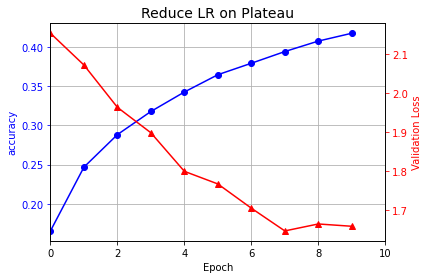

In [91]:
plt.plot(history.epoch, history.history["accuracy"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("accuracy", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, 10)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [95]:
earlystopping = keras.callbacks.EarlyStopping(patience = 20,restore_best_weights = True)
params = {"learning_rate":(1e-3,5e-5,1e-4,1e-5,2e-2,3e-2,3e-3,2e-4,2e-5)}
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(keras_clf,params,n_iter=10,cv =2)
rs.fit(x_train,y_train,epochs = 5,validation_data = (x_val,y_val),callbacks = [earlystopping])

c:\users\1042g\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Epoch 1/5
704/704 [==============================] - 14s 14ms/step - loss: 21.6708 - accuracy: 0.1188 - val_loss: 2.3799 - val_accuracy: 0.1848
Epoch 2/5
704/704 [==============================] - 10s 14ms/step - loss: 2.2744 - accuracy: 0.1879 - val_loss: 2.1544 - val_accuracy: 0.2116
Epoch 3/5
704/704 [==============================] - 10s 14ms/step - loss: 2.1122 - accuracy: 0.2310 - val_loss: 2.1340 - val_accuracy: 0.2284
Epoch 4/5
704/704 [==============================] - 10s 14ms/step - loss: 2.0349 - accuracy: 0.2482 - val_loss: 2.3615 - val_accuracy: 0.2000
Epoch 5/5
704/704 [==============================] - 3s 4ms/step - loss: 2.0778 - accuracy: 0.2378
Epoch 1/5
704/704 [==============================] - 13s 14ms/step - loss: 13.5389 - accuracy: 0.1138 - val_loss: 4.2184 - val_accuracy: 0.1094
Epoch 2/5
704/704 [==============================] - 10s 14ms/step - loss: 2.3360 - accuracy: 0.1810 - val_loss: 2.2975 - val_accuracy: 0.2048
Epoch 3/5
704/704 [======================

704/704 [==============================] - 12s 17ms/step - loss: 2.3925 - accuracy: 0.1628 - val_loss: 2.1994 - val_accuracy: 0.2026
Epoch 3/5
704/704 [==============================] - 11s 15ms/step - loss: 2.1560 - accuracy: 0.2191 - val_loss: 2.1135 - val_accuracy: 0.2270
Epoch 4/5
704/704 [==============================] - 11s 15ms/step - loss: 2.0636 - accuracy: 0.2466 - val_loss: 2.0643 - val_accuracy: 0.2478
Epoch 5/5
704/704 [==============================] - 3s 4ms/step - loss: 2.0426 - accuracy: 0.2488
Epoch 1/5
704/704 [==============================] - 13s 14ms/step - loss: 15.5985 - accuracy: 0.1176 - val_loss: 2.4073 - val_accuracy: 0.1578
Epoch 2/5
704/704 [==============================] - 10s 14ms/step - loss: 2.2876 - accuracy: 0.1892 - val_loss: 2.1881 - val_accuracy: 0.2186
Epoch 3/5
704/704 [==============================] - 10s 14ms/step - loss: 2.0904 - accuracy: 0.2332 - val_loss: 2.0556 - val_accuracy: 0.2506
Epoch 4/5
704/704 [==============================] -

RandomizedSearchCV(cv=2,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021632E2BA30>,
                   param_distributions={'learning_rate': (0.001, 5e-05, 0.0001,
                                                          1e-05, 0.02, 0.03,
                                                          0.003, 0.0002,
                                                          2e-05)})

In [96]:
rs.best_params_

{'learning_rate': 0.0002}

In [97]:
model= rs.best_estimator_.model

In [98]:
rs.best_score_

0.27086667716503143

In [99]:
rs.param_distributions

{'learning_rate': (0.001,
  5e-05,
  0.0001,
  1e-05,
  0.02,
  0.03,
  0.003,
  0.0002,
  2e-05)}

In [100]:
history = model.fit(x_train,y_train,epochs = 50,validation_data = (x_val,y_val),callbacks = [earlystopping])

Epoch 1/50
1407/1407 [==============================] - 24s 16ms/step - loss: 1.7592 - accuracy: 0.3598 - val_loss: 1.7301 - val_accuracy: 0.3682
Epoch 2/50
1407/1407 [==============================] - 23s 16ms/step - loss: 1.7184 - accuracy: 0.3765 - val_loss: 1.7402 - val_accuracy: 0.3618
Epoch 3/50
1407/1407 [==============================] - 23s 16ms/step - loss: 1.6828 - accuracy: 0.3889 - val_loss: 1.6716 - val_accuracy: 0.3980
Epoch 4/50
1407/1407 [==============================] - 23s 17ms/step - loss: 1.6523 - accuracy: 0.4024 - val_loss: 1.7375 - val_accuracy: 0.3732
Epoch 5/50
1407/1407 [==============================] - 24s 17ms/step - loss: 1.6234 - accuracy: 0.4119 - val_loss: 1.6590 - val_accuracy: 0.3960
Epoch 6/50
1407/1407 [==============================] - 23s 16ms/step - loss: 1.5960 - accuracy: 0.4226 - val_loss: 1.6163 - val_accuracy: 0.4106
Epoch 7/50
1407/1407 [==============================] - 23s 16ms/step - loss: 1.5736 - accuracy: 0.4308 - val_loss: 1.6156 -

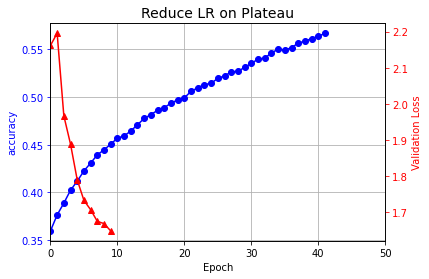

In [101]:
plt.plot(history.epoch, history.history["accuracy"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("accuracy", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, 50)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(istory.epoch, istory.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [102]:

model.evaluate(x_val, y_val)


157/157 [==============================] - 1s 4ms/step - loss: 1.5180 - accuracy: 0.4594


[1.5180095434188843, 0.4593999981880188]

In [ ]:
#we get lowest val_loss on 22 epoch and taking 18 seconds   for an epoch
#c part

In [106]:
def build_model(n_hidden= 20,input_shape = [32,32,3],n_neurons = 100,learning_rate = 1e-3 ):
     model = keras.models.Sequential()
     model.add(keras.layers.Flatten(input_shape = input_shape))
     model.add(keras.layers.BatchNormalization())
     for _ in range(n_hidden):
        model.add(keras.layers.Dense(100,kernel_initializer = "he_normal"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation("elu"))
     model.add(keras.layers.Dense(10,activation = "softmax"))
     optimizer = keras.optimizers.Nadam(lr =learning_rate )
     model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
     return model 

In [107]:
keras_clf1 = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [108]:
keras_clf1 = keras.wrappers.scikit_learn.KerasClassifier(build_model)
params = {"learning_rate":(1e-3,5e-5,1e-4,1e-5,2e-2,3e-2,3e-3,2e-4,2e-5)}
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(keras_clf1,params,n_iter=10,cv =3)
rs.fit(x_train,y_train,epochs = 5,validation_data = (x_val,y_val),callbacks = [earlystopping])

Epoch 1/5
938/938 [==============================] - 32s 22ms/step - loss: 2.4809 - accuracy: 0.1595 - val_loss: 2.0530 - val_accuracy: 0.2660
Epoch 2/5
938/938 [==============================] - 19s 21ms/step - loss: 2.0519 - accuracy: 0.2788 - val_loss: 1.8781 - val_accuracy: 0.3276
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 1.9112 - accuracy: 0.3181 - val_loss: 1.7913 - val_accuracy: 0.3610
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 1.8436 - accuracy: 0.3484 - val_loss: 1.7361 - val_accuracy: 0.3814
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 1.7222 - accuracy: 0.3841
Epoch 1/5
938/938 [==============================] - 30s 23ms/step - loss: 2.4407 - accuracy: 0.1528 - val_loss: 2.0102 - val_accuracy: 0.2734
Epoch 2/5
938/938 [==============================] - 21s 23ms/step - loss: 2.0396 - accuracy: 0.2599 - val_loss: 1.8613 - val_accuracy: 0.3282
Epoch 3/5
938/938 [========================

938/938 [==============================] - 23s 25ms/step - loss: 2.0717 - accuracy: 0.2526 - val_loss: 1.8927 - val_accuracy: 0.3188
Epoch 3/5
938/938 [==============================] - 23s 24ms/step - loss: 1.9268 - accuracy: 0.3053 - val_loss: 1.7992 - val_accuracy: 0.3532
Epoch 4/5
938/938 [==============================] - 22s 24ms/step - loss: 1.8508 - accuracy: 0.3337 - val_loss: 1.7435 - val_accuracy: 0.3692
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 1.7142 - accuracy: 0.3830
Epoch 1/5
938/938 [==============================] - 35s 24ms/step - loss: 2.5191 - accuracy: 0.1397 - val_loss: 2.0598 - val_accuracy: 0.2608
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 2.0631 - accuracy: 0.2562 - val_loss: 1.9006 - val_accuracy: 0.3124
Epoch 3/5
938/938 [==============================] - 21s 23ms/step - loss: 1.9133 - accuracy: 0.3065 - val_loss: 1.8114 - val_accuracy: 0.3492
Epoch 4/5
938/938 [==============================] - 

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000216C8986940>,
                   param_distributions={'learning_rate': (0.001, 5e-05, 0.0001,
                                                          1e-05, 0.02, 0.03,
                                                          0.003, 0.0002,
                                                          2e-05)})

In [109]:
rs.best_params_

{'learning_rate': 0.02}

In [112]:
model = rs.best_estimator_.model

In [113]:
history = model.fit(x_train,y_train,epochs = 20,validation_data = (x_val,y_val),callbacks = [earlystopping])

Epoch 1/20
1407/1407 [==============================] - 49s 27ms/step - loss: 1.6692 - accuracy: 0.4030 - val_loss: 1.5922 - val_accuracy: 0.4316
Epoch 2/20
1407/1407 [==============================] - 34s 24ms/step - loss: 1.6353 - accuracy: 0.4154 - val_loss: 1.5705 - val_accuracy: 0.4410
Epoch 3/20
1407/1407 [==============================] - 34s 24ms/step - loss: 1.6080 - accuracy: 0.4253 - val_loss: 1.5390 - val_accuracy: 0.4478
Epoch 4/20
1407/1407 [==============================] - 35s 25ms/step - loss: 1.5833 - accuracy: 0.4388 - val_loss: 1.5230 - val_accuracy: 0.4596
Epoch 5/20
1407/1407 [==============================] - 38s 27ms/step - loss: 1.5620 - accuracy: 0.4448 - val_loss: 1.5081 - val_accuracy: 0.4660
Epoch 6/20
1407/1407 [==============================] - 39s 28ms/step - loss: 1.5541 - accuracy: 0.4464 - val_loss: 1.4882 - val_accuracy: 0.4722
Epoch 7/20
1407/1407 [==============================] - 37s 27ms/step - loss: 1.5328 - accuracy: 0.4534 - val_loss: 1.4817 -

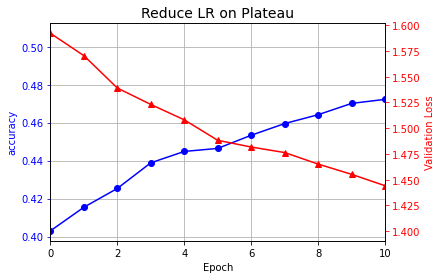

In [114]:
plt.plot(history.epoch, history.history["accuracy"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("accuracy", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, 10)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [115]:
model.evaluate(x_val,y_val)

157/157 [==============================] - 1s 5ms/step - loss: 1.4003 - accuracy: 0.5014


[1.4002571105957031, 0.5013999938964844]

In [ ]:
#d

In [8]:
def build_model(n_hidden= 20,input_shape = [32,32,3],n_neurons = 100,learning_rate = 1e-3 ):
     model = keras.models.Sequential()
     model.add(keras.layers.Flatten(input_shape = input_shape))
     for _ in range(n_hidden):
        model.add(keras.layers.Dense(100,activation= "selu",kernel_initializer = "he_normal"))
     model.add(keras.layers.Dense(10,activation = "softmax"))
     optimizer = keras.optimizers.Nadam(lr= learning_rate )
     model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
     return model 

In [9]:
x_means = x_train.mean(axis=0)
x_stds = x_train.std(axis=0)
x_train_scaled = (x_train - x_means) / x_stds
x_val_scaled = (x_val - x_means) / x_stds
X_test_scaled = (x_test - x_means) / x_stds

In [11]:
earlystopping = keras.callbacks.EarlyStopping(patience = 20,restore_best_weights = True)
keras_clf1 = keras.wrappers.scikit_learn.KerasClassifier(build_model)
params = {"learning_rate":(1e-3,5e-5,1e-4,1e-5,2e-2,3e-2,3e-3,2e-4,2e-5)}
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(keras_clf1,params,n_iter=5,cv =3)
rs.fit(x_train,y_train,epochs = 5,validation_data = (x_val,y_val),callbacks = [earlystopping])

Epoch 1/5
938/938 [==============================] - 20s 13ms/step - loss: 35.2009 - accuracy: 0.1111 - val_loss: 2.8460 - val_accuracy: 0.1392
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 2.6221 - accuracy: 0.1500 - val_loss: 2.3926 - val_accuracy: 0.1556
Epoch 3/5
938/938 [==============================] - 9s 10ms/step - loss: 2.2471 - accuracy: 0.1970 - val_loss: 2.1405 - val_accuracy: 0.2154
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: 2.1119 - accuracy: 0.2304 - val_loss: 2.0870 - val_accuracy: 0.2356
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1433 - accuracy: 0.2208
Epoch 1/5
938/938 [==============================] - 15s 13ms/step - loss: 28.6329 - accuracy: 0.1267 - val_loss: 2.7657 - val_accuracy: 0.1496
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: 2.4725 - accuracy: 0.1852 - val_loss: 2.2454 - val_accuracy: 0.2094
Epoch 3/5
938/938 [========================

938/938 [==============================] - 10s 11ms/step - loss: 2.6581 - accuracy: 0.1594 - val_loss: 2.3530 - val_accuracy: 0.1802
Epoch 3/5
938/938 [==============================] - 10s 11ms/step - loss: 2.2804 - accuracy: 0.1942 - val_loss: 2.2000 - val_accuracy: 0.2274
Epoch 4/5
938/938 [==============================] - 10s 11ms/step - loss: 2.1566 - accuracy: 0.2236 - val_loss: 2.2301 - val_accuracy: 0.2148
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 2.0972 - accuracy: 0.2298
Epoch 1/5
938/938 [==============================] - 13s 11ms/step - loss: 41.8111 - accuracy: 0.1203 - val_loss: 2.8605 - val_accuracy: 0.1738
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 2.6252 - accuracy: 0.1677 - val_loss: 2.4640 - val_accuracy: 0.1702
Epoch 3/5
938/938 [==============================] - 10s 11ms/step - loss: 2.2474 - accuracy: 0.2077 - val_loss: 2.4140 - val_accuracy: 0.1894
Epoch 4/5
938/938 [==============================] -

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027FCCAA91C0>,
                   n_iter=5,
                   param_distributions={'learning_rate': (0.001, 5e-05, 0.0001,
                                                          1e-05, 0.02, 0.03,
                                                          0.003, 0.0002,
                                                          2e-05)})

In [13]:
model = rs.best_estimator_.model

In [15]:
rs.best_params_

{'learning_rate': 0.0002}

In [16]:
history = model.fit(x_train_scaled,y_train,epochs = 20,validation_data = (x_val_scaled,y_val),callbacks = [earlystopping])

Epoch 1/20
1407/1407 [==============================] - 18s 11ms/step - loss: 2.2829 - accuracy: 0.2212 - val_loss: 1.9957 - val_accuracy: 0.2736
Epoch 2/20
1407/1407 [==============================] - 15s 11ms/step - loss: 1.9165 - accuracy: 0.2996 - val_loss: 1.8936 - val_accuracy: 0.2998
Epoch 3/20
1407/1407 [==============================] - 15s 11ms/step - loss: 1.8124 - accuracy: 0.3401 - val_loss: 1.8020 - val_accuracy: 0.3398
Epoch 4/20
1407/1407 [==============================] - 15s 11ms/step - loss: 1.7303 - accuracy: 0.3727 - val_loss: 1.7422 - val_accuracy: 0.3776
Epoch 5/20
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6635 - accuracy: 0.3963 - val_loss: 1.6882 - val_accuracy: 0.3834
Epoch 6/20
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5999 - accuracy: 0.4231 - val_loss: 1.6645 - val_accuracy: 0.4002
Epoch 7/20
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5504 - accuracy: 0.4417 - val_loss: 1.6237 -

In [17]:
model.evaluate(x_val_scaled,y_val)

157/157 [==============================] - 0s 3ms/step - loss: 1.6595 - accuracy: 0.4544


[1.6594678163528442, 0.4544000029563904]

In [ ]:
#e

In [41]:
def build_model(n_hidden= 20,input_shape = [32,32,3],n_neurons = 100,learning_rate = 1e-3 ):
     model = keras.models.Sequential()
     model.add(keras.layers.Flatten(input_shape = input_shape))
     for _ in range(n_hidden):
        model.add(keras.layers.Dense(100,activation= "selu",kernel_initializer = "he_normal"))
     model.add(keras.layers.AlphaDropout(rate =0.1))
     model.add(keras.layers.Dense(10,activation = "softmax"))
     optimizer = keras.optimizers.Nadam(lr =learning_rate )
     model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
     return model 

In [43]:
x_means = x_train.mean(axis=0)
x_stds = x_train.std(axis=0)
x_train_scaled = (x_train - x_means) / x_stds
x_val_scaled = (x_val - x_means) / x_stds
X_test_scaled = (x_test - x_means) / x_stds

In [44]:
earlystopping = keras.callbacks.EarlyStopping(patience = 20,restore_best_weights = True)
keras_clf1 = keras.wrappers.scikit_learn.KerasClassifier(build_model)
params = {"learning_rate":(1e-3,5e-5,1e-4,1e-5,2e-2,3e-2,3e-3,2e-4,2e-5)}
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(keras_clf1,params,n_iter=5,cv =3)
rs.fit(x_train,y_train,epochs = 5,validation_data = (x_val,y_val),callbacks = [earlystopping])

Epoch 1/5
938/938 [==============================] - 53s 22ms/step - loss: 16934.4891 - accuracy: 0.1307 - val_loss: 2.3102 - val_accuracy: 0.1612
Epoch 2/5
938/938 [==============================] - 17s 17ms/step - loss: 22902342292819536.0000 - accuracy: 0.1453 - val_loss: 3.9240 - val_accuracy: 0.1038
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 5.1150 - accuracy: 0.1036 - val_loss: 3.1691 - val_accuracy: 0.1038
Epoch 4/5
938/938 [==============================] - 15s 16ms/step - loss: 2.9597 - accuracy: 0.1013 - val_loss: 3.6898 - val_accuracy: 0.0996
Epoch 5/5
469/469 [==============================] - 3s 4ms/step - loss: 3.5612 - accuracy: 0.0979
Epoch 1/5
938/938 [==============================] - 23s 18ms/step - loss: 17535.3701 - accuracy: 0.0985 - val_loss: 2.3948 - val_accuracy: 0.1010
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 2.3064 - accuracy: 0.1005 - val_loss: 2.3844 - val_accuracy: 0.1010
Epoch 3/5
938/938 [

Epoch 2/5
938/938 [==============================] - 17s 19ms/step - loss: 2.1567 - accuracy: 0.1997 - val_loss: 2.0275 - val_accuracy: 0.2500
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 2.0133 - accuracy: 0.2467 - val_loss: 2.0827 - val_accuracy: 0.2334
Epoch 4/5
938/938 [==============================] - 18s 19ms/step - loss: 1.9601 - accuracy: 0.2757 - val_loss: 1.8979 - val_accuracy: 0.3108
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 1.8803 - accuracy: 0.3104
Epoch 1/5
938/938 [==============================] - 22s 20ms/step - loss: 20.6002 - accuracy: 0.1276 - val_loss: 2.1603 - val_accuracy: 0.2016
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 2.1999 - accuracy: 0.1972 - val_loss: 2.0825 - val_accuracy: 0.2350
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 2.0216 - accuracy: 0.2511 - val_loss: 2.1656 - val_accuracy: 0.2334
Epoch 4/5
938/938 [=======================

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027FDBA4B0D0>,
                   n_iter=5,
                   param_distributions={'learning_rate': (0.001, 5e-05, 0.0001,
                                                          1e-05, 0.02, 0.03,
                                                          0.003, 0.0002,
                                                          2e-05)})

In [45]:
history = model.fit(x_train_scaled,y_train,epochs = 20,validation_data = (x_val_scaled,y_val),callbacks = [earlystopping])

Epoch 1/20
1407/1407 [==============================] - 25s 18ms/step - loss: 0.6201 - accuracy: 0.7833 - val_loss: 2.3175 - val_accuracy: 0.4332
Epoch 2/20
1407/1407 [==============================] - 24s 17ms/step - loss: 0.6165 - accuracy: 0.7856 - val_loss: 2.3304 - val_accuracy: 0.4320
Epoch 3/20
1407/1407 [==============================] - 25s 18ms/step - loss: 0.6009 - accuracy: 0.7906 - val_loss: 2.3965 - val_accuracy: 0.4378
Epoch 4/20
1407/1407 [==============================] - 25s 17ms/step - loss: 0.5859 - accuracy: 0.7970 - val_loss: 2.4120 - val_accuracy: 0.4318
Epoch 5/20
1407/1407 [==============================] - 25s 18ms/step - loss: 0.5749 - accuracy: 0.8005 - val_loss: 2.4587 - val_accuracy: 0.4362
Epoch 6/20
1407/1407 [==============================] - 24s 17ms/step - loss: 0.5590 - accuracy: 0.8057 - val_loss: 2.4906 - val_accuracy: 0.4332
Epoch 7/20
1407/1407 [==============================] - 25s 18ms/step - loss: 0.5476 - accuracy: 0.8107 - val_loss: 2.6084 -

In [46]:
model.evaluate(x_val_scaled,y_val)

157/157 [==============================] - 1s 6ms/step - loss: 3.0143 - accuracy: 0.4212


[3.0143086910247803, 0.4212000072002411]

In [48]:
#mc dropout
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    

In [49]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [50]:
def mc_dropout_predict_probas(mc_model,x,n_samples = 10):
    y_probas = [mc_model.predict(x) for sample in range(n_samples)]
    return np.mean(y_probas,axis = 0)
def mc_dropout_predict_classes(mc_model,x,n_samples =10):
    y_probas = mc_dropout_predict_probas(mc_model, x, n_samples)
    return np.argmax(y_probas,axis =1)

In [51]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, x_val_scaled)
accuracy = np.mean(y_pred == y_val[:, 0])
accuracy

0.4212

In [ ]:
# we did not get the best improvement so the best model till now is batch normalization one 

In [ ]:
#f

In [56]:
def build_model(n_hidden= 20,input_shape = [32,32,3],n_neurons = 100,learning_rate = 1e-3 ):
     model = keras.models.Sequential()
     model.add(keras.layers.Flatten(input_shape = input_shape))
     for _ in range(n_hidden):
        model.add(keras.layers.Dense(100,activation= "selu",kernel_initializer = "he_normal"))
     model.add(keras.layers.AlphaDropout(rate = 0.1))
     model.add(keras.layers.Dense(10,activation = "softmax"))
     optimizer = keras.optimizers.Nadam(lr =learning_rate )
     model.compile(loss = "sparse_categorical_crossentropy",metrics = ["accuracy"],optimizer = optimizer)
     return model 

## 1 Cycle scheduling

In [123]:
import math as math 
from tensorflow  import keras

In [130]:
k = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self,batch,logs):
        self.rates.append(keras.backend.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        keras.backend.set_value(self.model.optiizer.lr,self.model.optimizer.lr *self.factor)
def find_learning_rate(model,x,y,epochs = 1,batch_size  = 30,min_rate = 10**-5,max_rate= 10):
    init_weights= model.get_weights()
    iterations = math.ceil(len(x)/batch_size) *epochs
    factor = np.exp(np.log(max_rate/min_rate)/iterations)
    init_lr =keras.backend.get_value(model.optimizer.lr)
    keras.backend.set_value(model.optimizer.lr,min_rate)
    expo_lr = ExponentialLearningRate(factor)
    history = model.fit(x, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[expo_lr])
    keras.backend.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return expo_lr.rates, expo_lr.losses
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")


In [131]:
'''In the on_batch_end() method, logs["loss"] used to contain the batch loss, but in 
TensorFlow 2.2.0 it was replaced with the mean loss (since the start of the epoch). 
This explains why the graph below is much smoother than in the book (if you are using TF 2.2 or above).
It also means that there is a lag between the moment the batch loss starts exploding and the moment
the explosion becomes clear in the graph. So you should choose a slightly smaller learning rate 
than you would have chosen with the "noisy" graph. Alternatively, you can tweak the ExponentialLearningRate callback above so it
computes the batch loss (based on the current mean loss and the previous mean loss):'''

'In the on_batch_end() method, logs["loss"] used to contain the batch loss, but in \nTensorFlow 2.2.0 it was replaced with the mean loss (since the start of the epoch). \nThis explains why the graph below is much smoother than in the book (if you are using TF 2.2 or above).\nIt also means that there is a lag between the moment the batch loss starts exploding and the moment\nthe explosion becomes clear in the graph. So you should choose a slightly smaller learning rate \nthan you would have chosen with the "noisy" graph. Alternatively, you can tweak the ExponentialLearningRate callback above so it\ncomputes the batch loss (based on the current mean loss and the previous mean loss):'

In [132]:
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_epoch_begin(self, epoch, logs=None):
        self.prev_loss = 0
    def on_batch_end(self, batch, logs=None):
        batch_loss = logs["loss"] * (batch + 1) - self.prev_loss * batch
        self.prev_loss = logs["loss"]
        self.rates.append(keras.backend.get_value(self.model.optimizer.lr))
        self.losses.append(batch_loss)
        keras.backend.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

352/352 [==============================] - 9s 26ms/step - loss: nan - accuracy: 0.5794


(9.999999747378752e-06,
 9.615227699279785,
 0.19915145635604858,
 0.28949805668422157)

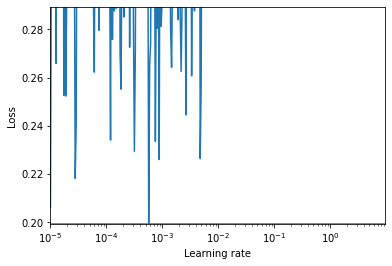

In [133]:

batch_size = 128
rates, losses = find_learning_rate(model, x_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])